In [51]:
!pip install xgboost

In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [13]:
X = pd.read_csv("data.csv", index_col=0)
y = pd.read_csv("labels.csv", index_col=0)

target_names = ['Colon cancer', 'Breast cancer', 'Lung cancer', 'Prostate cancer']

In [3]:
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

y_encoded

/home/dilara/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.3, random_state=42)

In [6]:
xgbc = XGBClassifier(learning_rate=0.1, objective='multi:softmax', num_class = 4)

In [7]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=4, num_parallel_tree=1, objective='multi:softmax', ...)

In [8]:
y_pred_xgb = xgbc.predict(X_test)

In [9]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [10]:
accuracy_xgb

0.9906542056074766

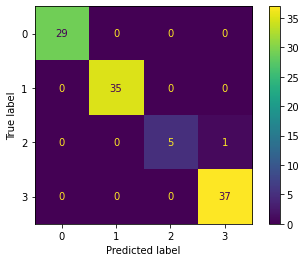

In [11]:
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

cm_display = ConfusionMatrixDisplay(xgb_cm).plot()

In [14]:
print(classification_report(y_test, y_pred_xgb, target_names=target_names))

                 precision    recall  f1-score   support

   Colon cancer       1.00      1.00      1.00        29
  Breast cancer       1.00      1.00      1.00        35
    Lung cancer       1.00      0.83      0.91         6
Prostate cancer       0.97      1.00      0.99        37

       accuracy                           0.99       107
      macro avg       0.99      0.96      0.97       107
   weighted avg       0.99      0.99      0.99       107



In [29]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=None)

In [30]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred_rf = rfc.predict(X_test)

In [32]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [33]:
accuracy_rf

0.9719626168224299

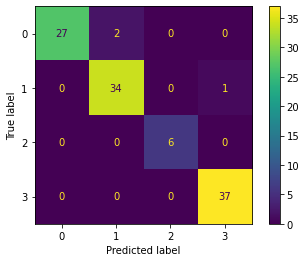

In [34]:
rf_cm = confusion_matrix(y_test, y_pred_rf)

cm_display = ConfusionMatrixDisplay(rf_cm).plot()

In [35]:
print(classification_report(y_test, y_pred_rf, target_names=target_names))

                 precision    recall  f1-score   support

   Colon cancer       1.00      0.93      0.96        29
  Breast cancer       0.94      0.97      0.96        35
    Lung cancer       1.00      1.00      1.00         6
Prostate cancer       0.97      1.00      0.99        37

       accuracy                           0.97       107
      macro avg       0.98      0.98      0.98       107
   weighted avg       0.97      0.97      0.97       107



In [22]:
lgbc = lgb.LGBMClassifier(max_depth = -3, learning_rate = 0.02, objective = 'multiclass', metric = 'multi_logloss', 
num_classes = 4, boosting_type = 'gbdt')

In [23]:
lgbc.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.02, max_depth=-3, metric='multi_logloss',
               num_classes=4, objective='multiclass')

In [24]:
y_pred_lgb = lgbc.predict(X_test)

In [25]:
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)

In [26]:
accuracy_lgb

0.9719626168224299

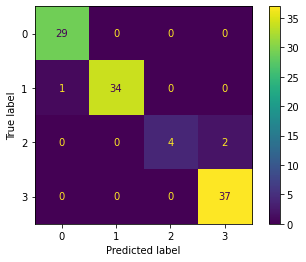

In [27]:
lgb_cm = confusion_matrix(y_test, y_pred_lgb)

cm_display = ConfusionMatrixDisplay(lgb_cm).plot()

In [28]:
print(classification_report(y_test, y_pred_lgb, target_names=target_names))

                 precision    recall  f1-score   support

   Colon cancer       0.97      1.00      0.98        29
  Breast cancer       1.00      0.97      0.99        35
    Lung cancer       1.00      0.67      0.80         6
Prostate cancer       0.95      1.00      0.97        37

       accuracy                           0.97       107
      macro avg       0.98      0.91      0.94       107
   weighted avg       0.97      0.97      0.97       107

